In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
datapath_names = Path(open("path-name-list.txt", "r").read()).expanduser()

In [3]:
samples=pd.read_csv(str(datapath_names) +'//sample-names.csv',header=None)
samples

,0
0,TAU-N604-H
1,TAU-N604-O
2,TAU-N595-H
3,TAU-HV-H
4,TAU-HX-H
5,KPech-Orion-H
6,KPech-Orion-N
7,KPech-Orion-O
8,KPech-Orion-S
9,MUSE-Dor-H


In [4]:
Names=pd.read_csv(str(datapath_names) +'//formal-names.csv',header=None)
Names

,0
0,NGC 604
1,NGC 604 [OIII]
2,NGC 595
3,Hubble V
4,Hubble X
5,Orion
6,Orion [NII]
7,Orion [OIII]
8,Orion [SII]
9,30 Dor


In [5]:
text_file_0 = open("path-vf.txt", "r")
path_res = text_file_0.read()

In [6]:
datapath= Path(path_res).expanduser()

In [7]:
data = {}
Results = {}

for i in range(len(samples)):
    data[samples[0][i]] = json.load(open(str(datapath) + '/' + samples[0][i] + "-l.json"))
    Results[samples[0][i]]=pd.DataFrame(data[samples[0][i]][samples[0][i]])
    if Results[samples[0][i]].shape[1] == 6:
        Results[samples[0][i]].columns=['X','Y','RV','I','Sig','SigDisp']
    elif Results[samples[0][i]].shape[1] == 5:
        Results[samples[0][i]].columns=['X','Y','RV','I','Sig']
    elif Results[samples[0][i]].shape[1] == 4:
        Results[samples[0][i]].columns=['X','Y','RV','I']
    else:
        Results[samples[0][i]].columns=['X','Y','RV']
#Results

In [8]:
for i in range(len(samples)):
    RVhist = Results[samples[0][i]].RV - Results[samples[0][i]].RV.mean()
    Results[samples[0][i]]['RVhist'] = RVhist

Text(0.5, 0, 'Radial velocity[km/s]')

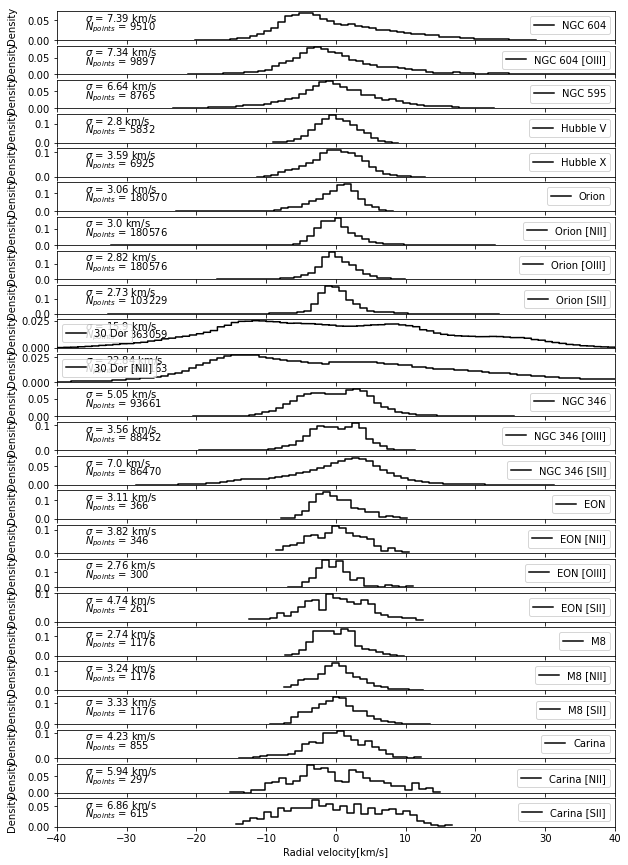

In [9]:
fig, axes = plt.subplots(len(samples), 1, figsize=(10, 15), sharex=True)
#fig, axes = plt.subplots(len(samples), 1, figsize=(8, 10), sharex=True)
#fig.suptitle('PDFs')

for i in range(len(samples)):
    sns.histplot(ax=axes[i],data=Results[samples[0][i]],
                 x="RVhist", binwidth=1, element="step", fill=False, label=str(Names[0][i]),  color='k', stat='density')
    axes[i].text(.05, .65,'$\sigma$ = ' + str(np.round(Results[samples[0][i]].RV.std(),2))+ ' km/s',  color='k', transform=axes[i].transAxes)
    axes[i].text(.05, .35,'$N_{points}$ = '+ str(Results[samples[0][i]].RV.count()),  color='k', transform=axes[i].transAxes)
    axes[i].legend()

fig.align_labels()    
plt.xlim(-40,40)
plt.xlabel('Radial velocity[km/s]')

#plt.savefig('Imgs//Hist.pdf', bbox_inches='tight')


In [10]:
!jupyter nbconvert --to script --no-prompt velocities-distributions.ipynb

[NbConvertApp] Converting notebook velocities-distributions.ipynb to script
[NbConvertApp] Writing 2205 bytes to velocities-distributions.py
